# Bài tập 1 🚢

##### 👀 Read Dataset

In [1]:
import pandas as pd

data = pd.read_csv('./titanic.csv', usecols=['survived', 'age', 'fare'])

data.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


## 14 tổ hợp làm sạch dữ liệu

##### 🚫 Missing data

In [2]:
data.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [3]:
num_NaN = data['age'].isnull().sum()
num_NaN

177

<AxesSubplot:>

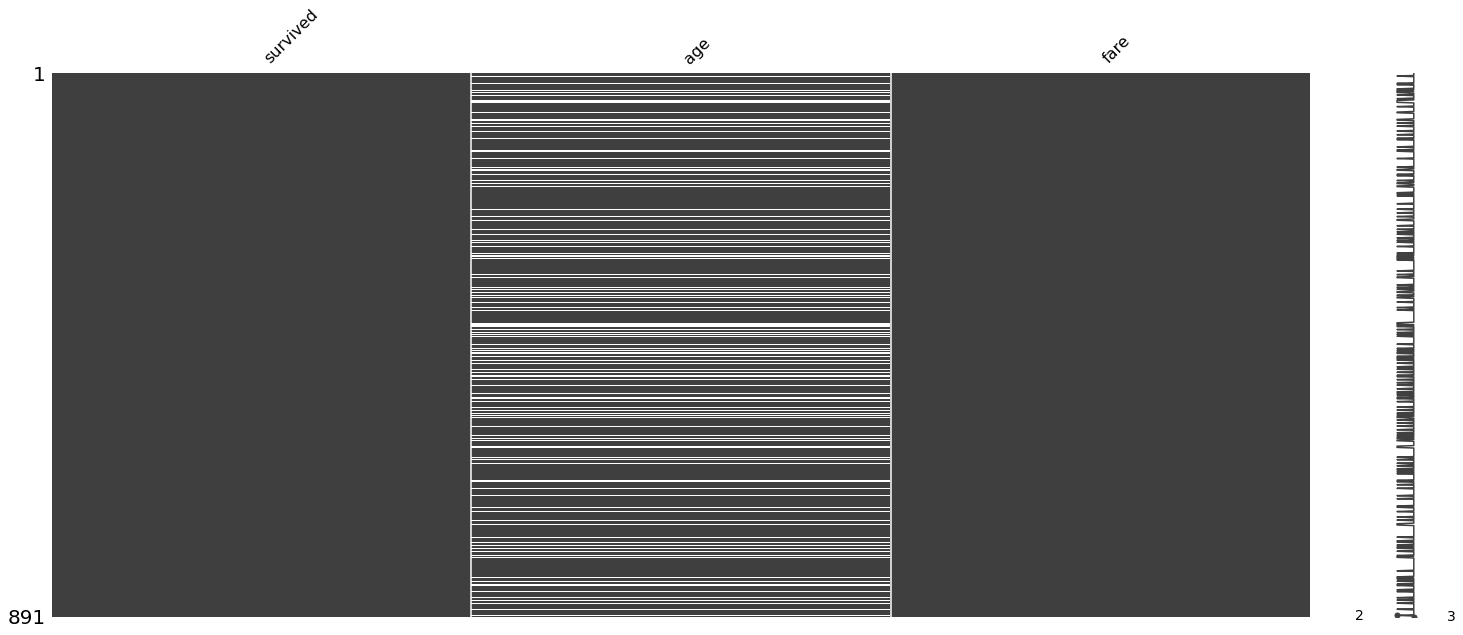

In [4]:
import missingno as msno

msno.matrix(data)

### 7 kỹ thuật xử lý dữ liệu trống (Mean/Median/Mode imputation coi như 3 kỹ thuật khác nhau, kỹ thuật tạo đặc trưng mới phải sử dụng đồng thời biến Age và biến bổ sung Age_NAN để dự báo)
  * #### Trường hợp Không xử lý ngoại lệ

##### 🧹 Mean imputation

In [5]:
data_mean = data.copy()
value_mean = data_mean['age'].dropna().mean()
data_mean['age'].fillna(value_mean, inplace=True)

##### 🧹 Median imputation

In [6]:
data_median = data.copy()
value_median = data_median['age'].dropna().median()
data_median['age'].fillna(value_median, inplace=True)

##### 🧹 Mode imputation

In [7]:
data_mode = data.copy()
value_mode = data_mode['age'].dropna().mode()[0]
data_mode['age'].fillna(value_mode, inplace=True)

##### 🧹 Random sample imputation

In [8]:
data_random = data.copy()
values_random = data_random['age'].dropna().sample(n=num_NaN, random_state=0)
values_random.index = data_random[data_random['age'].isnull()].index
data_random['age'].update(values_random)

##### 🧹 End of distribution imputation

In [9]:
data_extreme = data.copy()
value_extreme = data_extreme['age'].mean() + 3*data_extreme['age'].std()
data_extreme['age'].fillna(value_extreme, inplace=True)

##### 🧹 Arbitrary value imputation
\* *Millennials between 23-38 seem to be the age group that travels the most. - Travel Statistics by Age Group 2020-2021 - Condor Ferries*

In [10]:
import numpy as np

data_arbitrary = data.copy()
value_arbitrary = np.random.randint(23, 38)
data_arbitrary['age'].fillna(value_arbitrary, inplace=True)

##### 🧹 Create a new feature

In [11]:
import numpy as np

data_nan = data.copy()
data_nan['age_nan'] = np.where(data_nan['age'].isnull(), 1, 0)

data_nan.tail()

,survived,age,fare,age_nan
886,0,27.0,13.00,0
887,1,19.0,30.00,0
888,0,NaN,23.45,1
889,1,26.0,30.00,0
890,0,32.0,7.75,0


##### 📈 Visualization of replacing methods without outlier processing

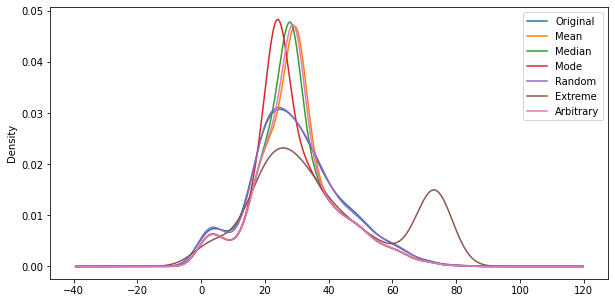

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
data['age'].plot(kind='kde', label='Original')
data_mean['age'].plot(kind='kde', label='Mean')
data_median['age'].plot(kind='kde', label='Median')
data_mode['age'].plot(kind='kde', label='Mode')
data_random['age'].plot(kind='kde', label='Random')
data_extreme['age'].plot(kind='kde', label='Extreme')
data_arbitrary['age'].plot(kind='kde', label='Arbitrary')
plt.legend()

###

  * #### Trường hợp Có xử lý ngoại lệ (đồng thời trên 2 biến Age và Fare)

##### 🧹 Outliers process

In [13]:
def outlier_process(data):
  data_temp = data.copy()
  lower_bound = data_temp['age'].mean() - 3*data_temp['age'].std()
  upper_bound = data_temp['age'].mean() + 3*data_temp['age'].std()
  data_temp.loc[data_temp['age'] < lower_bound, 'age'] = lower_bound
  data_temp.loc[data_temp['age'] > upper_bound, 'age'] = upper_bound

  iqr = data_temp['fare'].quantile(0.75) - data_temp['fare'].quantile(0.25)
  lower_bridge = data_temp['fare'].quantile(0.25) - 3*iqr
  upper_bridge = data_temp['fare'].quantile(0.75) + 3*iqr
  data_temp.loc[data_temp['fare'] < lower_bridge, 'fare'] = lower_bridge
  data_temp.loc[data_temp['fare'] > upper_bridge, 'fare'] = upper_bridge

  return data_temp

In [14]:
data_outlier_mean = outlier_process(data_mean)
data_outlier_median = outlier_process(data_median)
data_outlier_mode = outlier_process(data_mode)
data_outlier_random = outlier_process(data_random)
data_outlier_extreme = outlier_process(data_extreme)
data_outlier_arbitrary = outlier_process(data_arbitrary)

##### 📈 Visualization of replacing methods with outlier processing

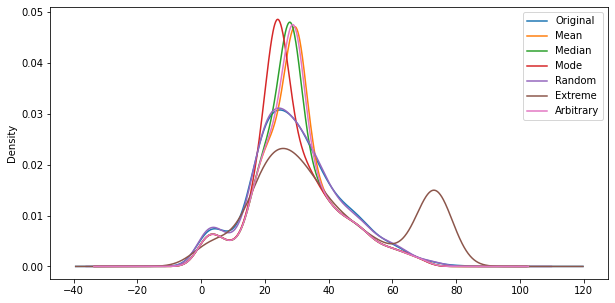

In [15]:
plt.figure(figsize=(10, 5))
data['age'].plot(kind='kde', label='Original')
data_outlier_mean['age'].plot(kind='kde', label='Mean')
data_outlier_median['age'].plot(kind='kde', label='Median')
data_outlier_mode['age'].plot(kind='kde', label='Mode')
data_outlier_random['age'].plot(kind='kde', label='Random')
data_outlier_extreme['age'].plot(kind='kde', label='Extreme')
data_outlier_arbitrary['age'].plot(kind='kde', label='Arbitrary')
plt.legend()

##### 🧮 Standard deviation of data

In [16]:
std_no_outlier_process = {
  'mean': data_mean['age'].std(),
  'median': data_median['age'].std(),
  'mode': data_mode['age'].std(),
  'random': data_random['age'].std(),
  'extreme': data_extreme['age'].std(),
  'arbitrary': data_arbitrary['age'].std()
}

std_outlier_process = {
  'mean': data_outlier_mean['age'].std(),
  'median': data_outlier_median['age'].std(),
  'mode': data_outlier_mode['age'].std(),
  'random': data_outlier_random['age'].std(),
  'extreme': data_outlier_extreme['age'].std(),
  'arbitrary': data_outlier_arbitrary['age'].std()
}

pd.DataFrame({'No outlier process': std_no_outlier_process, 'Outlier process': std_outlier_process}) 

,No outlier process,Outlier process
mean,13.002015,12.908011
median,13.019697,12.918277
mode,13.199572,13.091578
random,14.563654,14.513571
extreme,21.719151,21.719151
arbitrary,13.005010,12.907623


### Viết chương trình đánh giá độ chính xác của thuật toán **hồi quy logistic** trong bài toán dự báo **Sự sống/chết (Survived)** của hành khách lên tàu Titanic dựa trên **Độ tuổi (Age)** và **Giá vé (Fare)** mà họ đã mua trong 14 tổ hợp làm sạch dữ liệu trên

##### ✂️ Split dataset into 70% train, 30% test

In [17]:
from sklearn.model_selection import train_test_split

def split_data(data, test_size, random_state):
  predictors = data.drop(['survived'], axis=1)
  target = data['survived']
  x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=test_size, random_state=random_state)
  
  return x_train, x_test, y_train, y_test

##### 💡 Oversampling to avoid overfitting

In [18]:
from imblearn.over_sampling import SMOTE

def oversampling(data, test_size, random_state):
  x_train, x_test, y_train, y_test = split_data(data, test_size, random_state)
  smote = SMOTE(random_state=random_state)
  x_train, y_train = smote.fit_resample(x_train, y_train)
  
  return x_train, x_test, y_train, y_test

##### ⚡️ Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

def logistic_regression(x_train, x_test, y_train, y_test):
  classifier = LogisticRegression()
  classifier.fit(x_train, y_train)
  classifier.predict(x_test)
  accuracy = classifier.score(x_test, y_test)

  return accuracy

##### 🧮 Accuracy mean over 10 tests

In [20]:
def mean_accuracy(data):
  accuracies = []

  for i in range(10):
    x_train, x_test, y_train, y_test = oversampling(data, 0.3, i)
    accuracy = logistic_regression(x_train, x_test, y_train, y_test)
    accuracies.append(accuracy)

  return np.mean(accuracies)

### Lập bảng báo cáo độ chính xác của thuật toán trong 14 trường hợp trên và cho biết độ chính xác cao nhất và thấp nhất xảy ra trong trường hợp nào. Phân tích vì sao độ chính xác cao/thấp như vậy (Train/Test phân theo tỉ lệ 70/30 như chương trình mẫu, mỗi trường hợp cần thử nghiệm 10 lần với random_state=0 đến 9 và lấy trung bình để được độ chính xác trung bình của thuật toán)

##### 🧮 Accuracy of Logistic Regression with 14 dataset over 10 tests

In [21]:
accuracy_no_outlier_process = {
  'mean': mean_accuracy(data_mean) * 100,
  'median': mean_accuracy(data_median) * 100,
  'mode': mean_accuracy(data_mode) * 100,
  'random': mean_accuracy(data_random) * 100,
  'extreme': mean_accuracy(data_extreme) * 100,
  'arbitrary': mean_accuracy(data_arbitrary) * 100
}

accuracy_outlier_process = {
  'mean': mean_accuracy(data_outlier_mean)*100,
  'median': mean_accuracy(data_outlier_median)*100,
  'mode': mean_accuracy(data_outlier_mode)*100,
  'random': mean_accuracy(data_outlier_random)*100,
  'extreme': mean_accuracy(data_outlier_extreme)*100,
  'arbitrary': mean_accuracy(data_outlier_arbitrary)*100
}

pd.DataFrame({'No outlier process': accuracy_no_outlier_process, 'Outlier process': accuracy_outlier_process})

,No outlier process,Outlier process
mean,68.843284,69.253731
median,69.253731,68.992537
mode,68.656716,68.805970
random,68.097015,68.171642
extreme,68.619403,68.619403
arbitrary,68.992537,69.141791


##### 🔖 Nhận xét
* **Độ chính xác cao nhất (69,25%)** xảy ra trong trường hợp làm sạch dữ liệu trống sử dụng kỹ thuật **mean imputation có xử lý ngoại lệ**
* **Độ chính xác thấp nhất (68,09%)** xảy ra trong trường hợp làm sạch dữ liệu trống sử dụng kỹ thuật **random sample không xử lý ngoại lệ**
##### 📌 Giải thích
* Vì đã dùng hàm `dropna()` để bỏ qua các NaN values nên có phần chính xác hơn
* Vì số lượng hành khách không sống sót nhiều hơn sống sót, đã **oversampling** data dùng `SMOTE` để tránh tình trạng **overfitting**

### Đề xuất các kỹ thuật chuẩn hoá dữ liệu phù hợp để cải thiện độ chính xác của thuật toán hồi quy logistic trong bài toán dự báo Sự sống/chết (Survived) của hành khách lên tàu Titanic dựa trên Độ tuổi (Age) và Giá vé (Fare) mà họ đã mua

##### 🧬 Feature transformation by z-score

In [22]:
from sklearn.preprocessing import StandardScaler

def normalize_z_score(data):
  data_temp = pd.DataFrame(StandardScaler().fit_transform(data[['age', 'fare']]), columns=['age', 'fare'])
  data_temp['survived'] = data['survived']

  return data_temp

##### 🧬 Feature transformation by Min-Max

In [23]:
from sklearn.preprocessing import MinMaxScaler

def normalize_min_max(data):
  data_temp = pd.DataFrame(MinMaxScaler().fit_transform(data[['age', 'fare']]), columns=['age', 'fare'])
  data_temp['survived'] = data['survived']

  return data_temp

##### 🧬 Feature transformation by Robust to outliers

In [24]:
from sklearn.preprocessing import RobustScaler

def normalize_robust(data):
  data_temp = pd.DataFrame(RobustScaler().fit_transform(data[['age', 'fare']]), columns=['age', 'fare'])
  data_temp['survived'] = data['survived']

  return data_temp

### Cho biết độ cải thiện (%) về độ chính xác dự báo khi áp dụng kỹ thuật chuẩn hoá dữ liệu đã đề xuất kết hợp với 1 trong 14 tổ hợp kỹ thuật làm sạch dữ liệu

##### 🧮 Accuracy of Logistic Regression with 21 dataset over 10 tests

In [25]:
accuracy_z_score_outlier_process = {
  'mean': mean_accuracy(normalize_z_score(data_outlier_mean))*100,
  'median': mean_accuracy(normalize_z_score(data_outlier_median))*100,
  'mode': mean_accuracy(normalize_z_score(data_outlier_mode))*100,
  'random': mean_accuracy(normalize_z_score(data_outlier_random))*100,
  'extreme': mean_accuracy(normalize_z_score(data_outlier_extreme))*100,
  'arbitrary': mean_accuracy(normalize_z_score(data_outlier_arbitrary))*100
}

accuracy_min_max_outlier_process = {
  'mean': mean_accuracy(normalize_min_max(data_outlier_mean))*100,
  'median': mean_accuracy(normalize_min_max(data_outlier_median))*100,
  'mode': mean_accuracy(normalize_min_max(data_outlier_mode))*100,
  'random': mean_accuracy(normalize_min_max(data_outlier_random))*100,
  'extreme': mean_accuracy(normalize_min_max(data_outlier_extreme))*100,
  'arbitrary': mean_accuracy(normalize_min_max(data_outlier_arbitrary))*100
}

accuracy_robust_outlier_process = {
  'mean': mean_accuracy(normalize_robust(data_outlier_mean))*100,
  'median': mean_accuracy(normalize_robust(data_outlier_median))*100,
  'mode': mean_accuracy(normalize_robust(data_outlier_mode))*100,
  'random': mean_accuracy(normalize_robust(data_outlier_random))*100,
  'extreme': mean_accuracy(normalize_robust(data_outlier_extreme))*100,
  'arbitrary': mean_accuracy(normalize_robust(data_outlier_arbitrary))*100
}

pd.DataFrame({
  'No outlier process': accuracy_no_outlier_process, 
  'Outlier process': accuracy_outlier_process, 
  'Normalize to Z-score': accuracy_z_score_outlier_process, 
  'Normalize to Min-max': accuracy_min_max_outlier_process, 
  'Normalize to Robust': accuracy_robust_outlier_process
})

,No outlier process,Outlier process,Normalize to Z-score,Normalize to Min-max,Normalize to Robust
mean,68.843284,69.253731,69.291045,69.067164,69.216418
median,69.253731,68.992537,68.917910,69.029851,68.955224
mode,68.656716,68.805970,68.768657,68.656716,68.843284
random,68.097015,68.171642,68.134328,68.246269,68.059701
extreme,68.619403,68.619403,68.619403,68.507463,68.656716
arbitrary,68.992537,69.141791,69.104478,69.104478,69.141791


##### 🔖 Nhận xét
* **Độ cải thiện 0,04%** về độ chính xác dự báo khi áp dụng kỹ thuật **chuẩn hóa dữ liệu theo z-score** kết hợp với kỹ thuật làm sạch dữ liệu bằng cách thay thế dữ liệu trống thành **giá trị mean** và **xử lý ngoại lệ**